In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [245]:
base = pd.read_csv('newborn_health_monitoring_with_risk.csv')
base

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-10,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-11,2,3.35,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-12,3,3.35,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-13,4,3.48,...,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-14,5,3.50,...,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-03-31,26,5.29,...,96,Formula,8,7,4,4.0,NaN,No,Yes,Healthy
2996,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-01,27,5.23,...,98,Breastfeeding,7,6,1,2.4,NaN,No,Yes,Healthy
2997,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-02,28,5.29,...,98,Breastfeeding,8,4,1,3.6,NaN,No,Yes,Healthy
2998,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-03,29,5.39,...,97,Mixed,10,5,2,2.2,NaN,No,No,Healthy


In [246]:
base.isnull().sum()

baby_id                           0
name                              0
gender                            0
gestational_age_weeks             0
birth_weight_kg                   0
birth_length_cm                   0
birth_head_circumference_cm       0
date                              0
age_days                          0
weight_kg                         0
length_cm                         0
head_circumference_cm             0
temperature_c                     0
heart_rate_bpm                    0
respiratory_rate_bpm              0
oxygen_saturation                 0
feeding_type                      0
feeding_frequency_per_day         0
urine_output_count                0
stool_count                       0
jaundice_level_mg_dl              0
apgar_score                    2900
immunizations_done                0
reflexes_normal                   0
risk_level                        0
dtype: int64

In [247]:
base['apgar_score'].describe()

count    100.000000
mean       8.400000
std        1.163415
min        7.000000
25%        7.000000
50%        8.000000
75%        9.250000
max       10.000000
Name: apgar_score, dtype: float64

In [248]:
base.drop('apgar_score', axis=1, inplace=True)
base.drop('date', axis=1, inplace=True)

In [249]:
base['feeding_type'].unique()

array(['Formula', 'Breastfeeding', 'Mixed'], dtype=object)

In [250]:
base['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [251]:
base['immunizations_done'].unique()

array(['Yes', 'No'], dtype=object)

In [252]:
base['reflexes_normal'].unique()

array(['Yes', 'No'], dtype=object)

In [253]:
base['risk_level'].unique()

array(['At Risk', 'Healthy'], dtype=object)

In [254]:
base.isna().sum()

baby_id                        0
name                           0
gender                         0
gestational_age_weeks          0
birth_weight_kg                0
birth_length_cm                0
birth_head_circumference_cm    0
age_days                       0
weight_kg                      0
length_cm                      0
head_circumference_cm          0
temperature_c                  0
heart_rate_bpm                 0
respiratory_rate_bpm           0
oxygen_saturation              0
feeding_type                   0
feeding_frequency_per_day      0
urine_output_count             0
stool_count                    0
jaundice_level_mg_dl           0
immunizations_done             0
reflexes_normal                0
risk_level                     0
dtype: int64

In [255]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
base['feeding_type'] = le.fit_transform(base['feeding_type'])

le2 = LabelEncoder()
base['gender'] = le2.fit_transform(base['gender'])

le3 = LabelEncoder()
base['immunizations_done'] = le3.fit_transform(base['immunizations_done'])

le4 = LabelEncoder()
base['reflexes_normal'] = le4.fit_transform(base['reflexes_normal'])

le5 = LabelEncoder()
base['risk_level'] = le5.fit_transform(base['risk_level'])

In [256]:
base.drop('baby_id', axis=1, inplace=True)
base.drop('name', axis=1, inplace=True)

In [294]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       3000 non-null   int64  
 1   gestational_age_weeks        3000 non-null   float64
 2   birth_weight_kg              3000 non-null   float64
 3   birth_length_cm              3000 non-null   float64
 4   birth_head_circumference_cm  3000 non-null   float64
 5   age_days                     3000 non-null   int64  
 6   weight_kg                    3000 non-null   float64
 7   length_cm                    3000 non-null   float64
 8   head_circumference_cm        3000 non-null   float64
 9   temperature_c                3000 non-null   float64
 10  heart_rate_bpm               3000 non-null   int64  
 11  respiratory_rate_bpm         3000 non-null   int64  
 12  oxygen_saturation            3000 non-null   int64  
 13  feeding_type      

<Axes: >

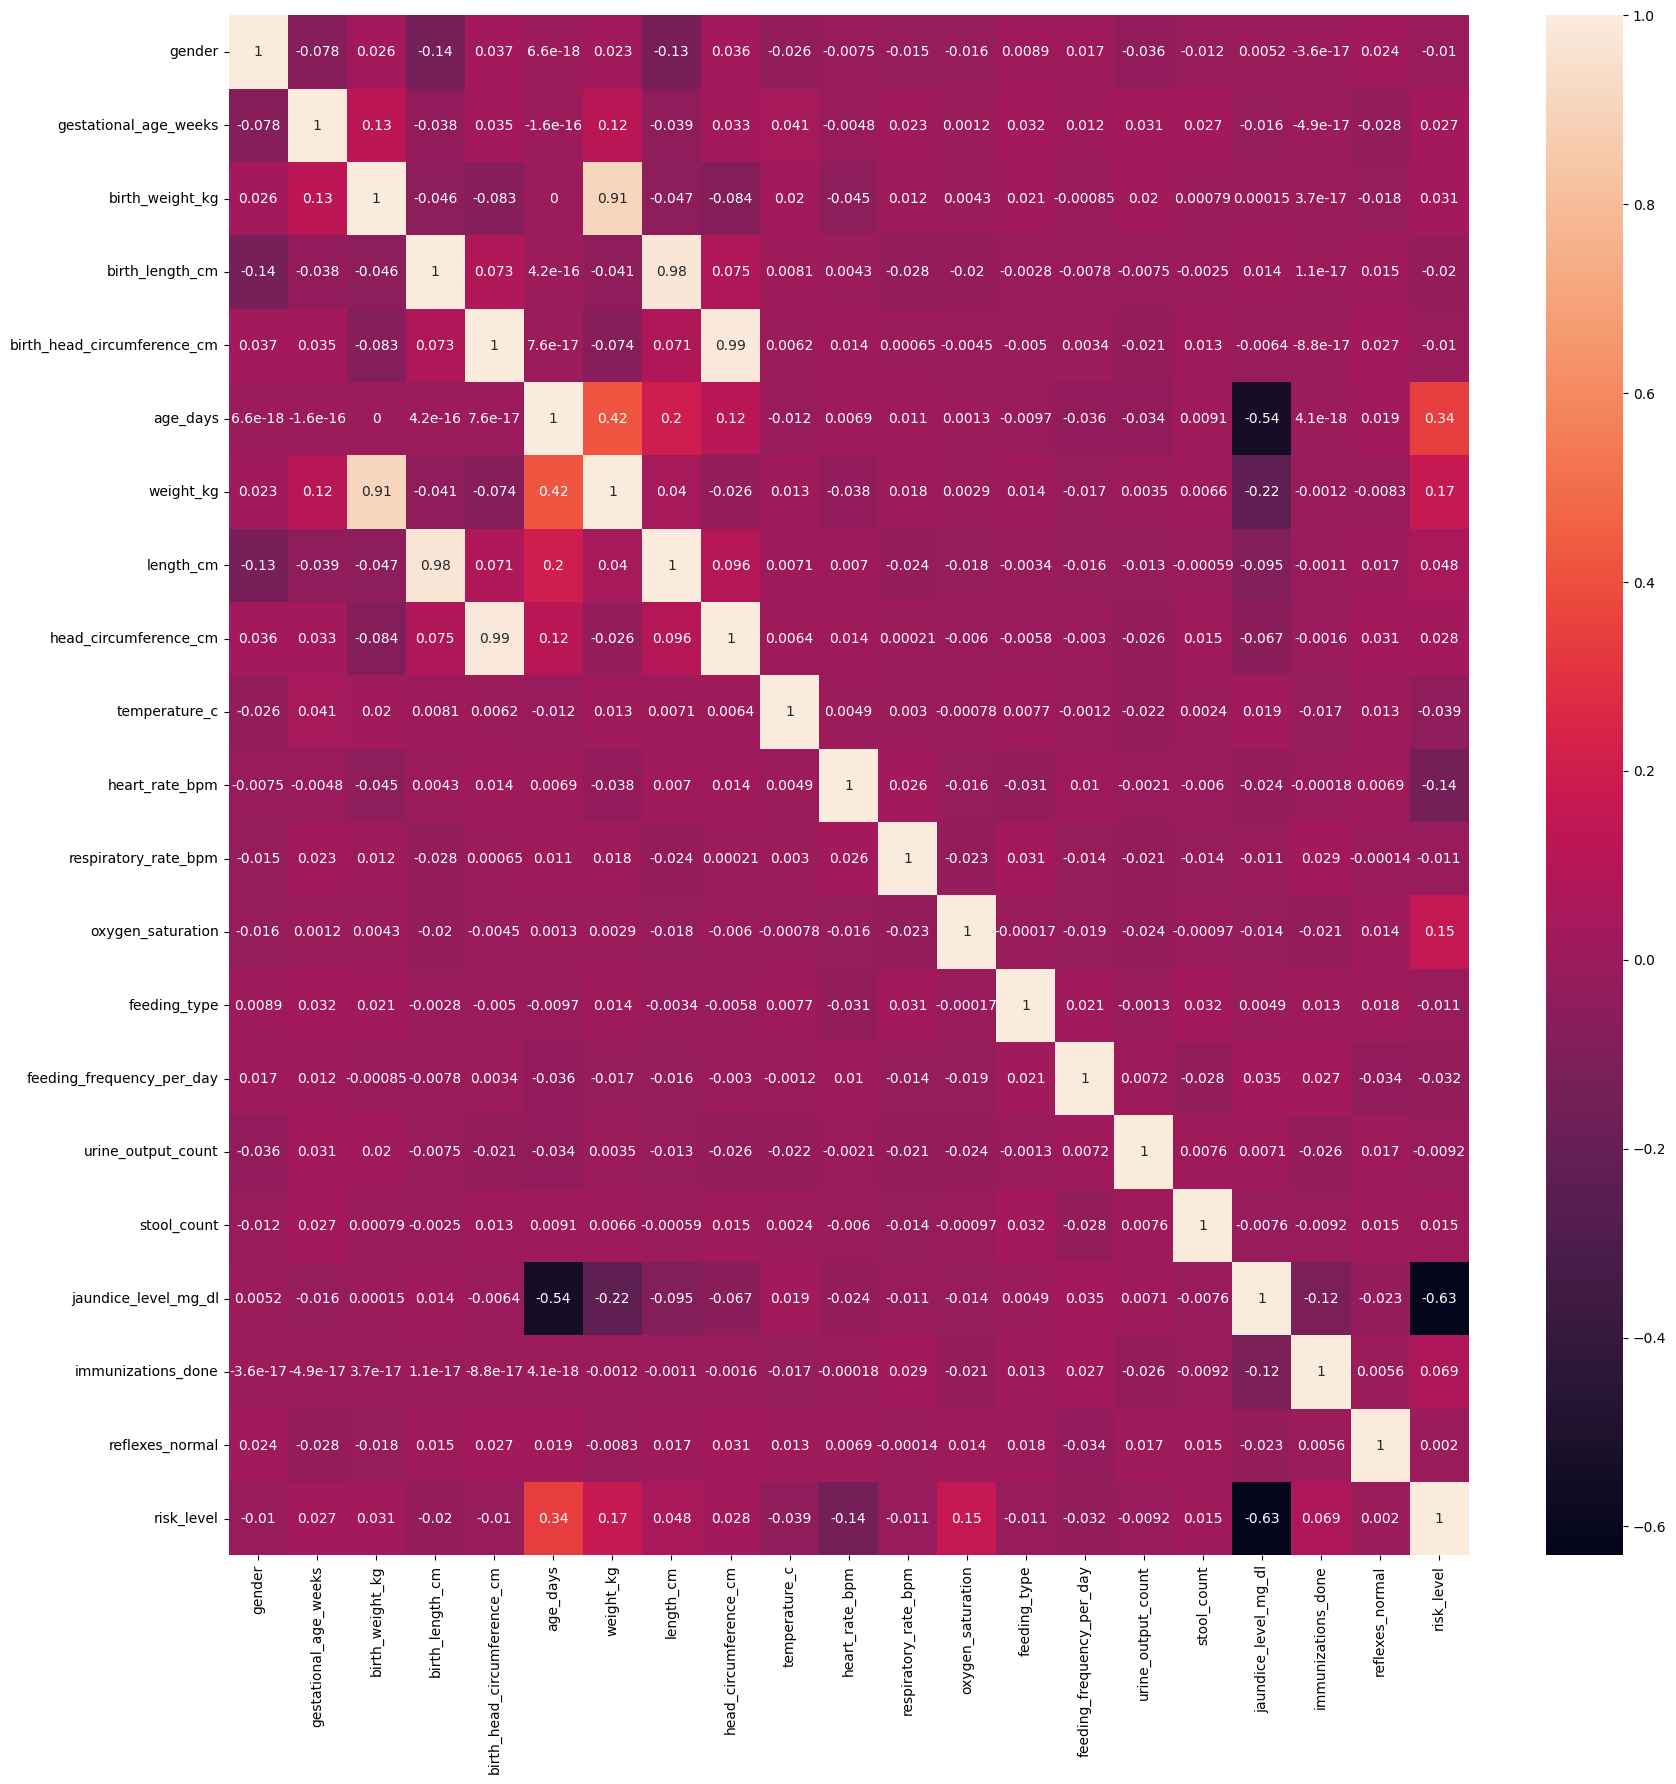

In [257]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base.corr(),  annot=True)

In [258]:
x_base = base.iloc[:, :20].values
y_base = base.iloc[:, 20].values

In [259]:
x_base

array([[ 0.  , 40.2 ,  3.3 , ...,  4.2 ,  1.  ,  1.  ],
       [ 0.  , 40.2 ,  3.3 , ..., 10.6 ,  0.  ,  0.  ],
       [ 0.  , 40.2 ,  3.3 , ...,  9.8 ,  0.  ,  0.  ],
       ...,
       [ 1.  , 39.1 ,  4.47, ...,  3.6 ,  0.  ,  1.  ],
       [ 1.  , 39.1 ,  4.47, ...,  2.2 ,  0.  ,  0.  ],
       [ 1.  , 39.1 ,  4.47, ...,  3.  ,  1.  ,  1.  ]], shape=(3000, 20))

In [260]:
y_base

array([0, 0, 1, ..., 1, 1, 1], shape=(3000,))

In [261]:
from sklearn.model_selection import train_test_split
x_base_treinamento, x_base_teste, y_base_treinamento, y_base_teste = train_test_split(x_base, y_base, test_size=0.3, random_state=0)

In [262]:
x_base_treinamento.shape, x_base_teste.shape

((2100, 20), (900, 20))

#Regressão Linear Múltipla

In [263]:
from sklearn.linear_model import LinearRegression
regressor_multiplo = LinearRegression()
regressor_multiplo.fit(x_base_treinamento, y_base_treinamento)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [264]:
regressor_multiplo.score(x_base_treinamento, y_base_treinamento)

0.4523634501149927

In [265]:
regressor_multiplo.score(x_base_teste, y_base_teste)

0.4258676419030486

In [266]:
previsoes = regressor_multiplo.predict(x_base_teste)
previsoes

array([0.79207493, 0.46326588, 0.97999707, 0.23960885, 0.74414808,
       0.93654719, 0.3775057 , 1.11563995, 0.95119142, 0.24490533,
       1.20275893, 0.9349095 , 0.84215158, 1.03608252, 1.03854142,
       0.99528519, 0.94205092, 0.7558226 , 1.05141895, 1.07260965,
       1.2167706 , 1.21240021, 0.7830036 , 0.97133754, 0.84981948,
       1.10351091, 0.89451385, 0.43407682, 0.92407603, 0.95369711,
       0.86505828, 0.77303855, 0.93593862, 0.74340194, 0.88339825,
       1.06876409, 1.05756445, 0.89471697, 0.42188006, 0.99467855,
       0.86105841, 1.00494807, 0.30191641, 0.95156985, 1.04278224,
       0.78483351, 1.03215012, 0.9988783 , 0.94861245, 1.03941024,
       0.35368349, 0.80915837, 0.97347692, 1.20192665, 1.0221    ,
       0.96241395, 0.83701108, 0.2292047 , 0.30213615, 0.88198916,
       0.92560502, 0.95875986, 0.97194611, 0.76398005, 0.87769446,
       0.54082027, 0.92576484, 0.31160583, 0.90291014, 0.91239908,
       0.90947533, 0.80466062, 0.86618123, 0.5082921 , 1.02152

In [267]:
y_base_teste

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [268]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_base_teste, previsoes)
mse = mean_squared_error(y_base_teste, previsoes)
rmse = np.sqrt(mean_squared_error(y_base_teste, previsoes))
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.17052655844252054
MSE: 0.0700413124663066
RMSE: 0.2646531928133621


#Regressão Polinomial

In [269]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2)

In [270]:
x_base_treinamento_poly = poly.fit_transform(x_base_treinamento)
x_base_teste_poly = poly.transform(x_base_teste)

In [271]:
regressor_poly = LinearRegression()
regressor_poly.fit(x_base_treinamento_poly, y_base_treinamento)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [272]:
regressor_poly.score(x_base_treinamento_poly, y_base_treinamento)

0.6902400480971629

In [273]:
regressor_poly.score(x_base_teste_poly, y_base_teste)

0.5957020574933611

In [274]:
previsoes = regressor_poly.predict(x_base_teste_poly)
previsoes

array([ 1.09657561e+00,  6.46341279e-01,  5.87395661e-01,  1.67227708e-01,
        7.66614227e-01,  1.03129495e+00,  4.81501941e-01,  9.54937055e-01,
        1.10337243e+00,  1.99069008e-01,  1.07581845e+00,  1.03399419e+00,
        1.04289287e+00,  8.91224166e-01,  1.08552849e+00,  1.03504666e+00,
        1.00206030e+00,  7.89726426e-01,  1.05505192e+00,  1.04113575e+00,
        1.00407857e+00,  1.09091195e+00,  8.34936476e-01,  1.07847895e+00,
        8.15637499e-01,  1.02712538e+00,  9.15042606e-01,  6.48627275e-01,
        1.13936263e+00,  1.03029332e+00,  9.00699450e-01,  9.22955248e-01,
        1.11481302e+00,  7.90811196e-01,  9.08940952e-01,  9.79831996e-01,
        1.05686599e+00,  8.46123530e-01,  6.02608028e-01,  1.01712072e+00,
        8.97041159e-01,  9.95874305e-01, -7.43775888e-04,  1.25389440e+00,
        1.02843613e+00,  3.26420008e-01,  1.03669732e+00,  1.13738770e+00,
        1.06024949e+00,  1.00909364e+00, -2.22838793e-01,  8.84471165e-01,
        1.15116781e+00,  

In [275]:
y_base_teste

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [276]:
mae = mean_absolute_error(y_base_teste, previsoes)
mse = mean_squared_error(y_base_teste, previsoes)
rmse = np.sqrt(mean_squared_error(y_base_teste, previsoes))
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.14840947680658656
MSE: 0.04932235245276053
RMSE: 0.22208636259968897


#Regressão por Árvore de Decisão

In [277]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore = DecisionTreeRegressor()
regressor_arvore.fit(x_base_treinamento, y_base_treinamento)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [278]:
regressor_arvore.score(x_base_treinamento, y_base_treinamento)

1.0

In [279]:
regressor_arvore.score(x_base_teste, y_base_teste)

1.0

In [291]:
previsoes = regressor_arvore.predict(x_base_teste)
previsoes

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [281]:
y_base_teste

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [292]:
print(np.array_equal(previsoes.astype(int), y_base_teste))

True


In [282]:
mae = mean_absolute_error(y_base_teste, previsoes)
mse = mean_squared_error(y_base_teste, previsoes)
rmse = np.sqrt(mean_squared_error(y_base_teste, previsoes))
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.0
MSE: 0.0
RMSE: 0.0


#Random Forest

In [283]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest = RandomForestRegressor(n_estimators=100)
regressor_random_forest.fit(x_base_treinamento, y_base_treinamento)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [284]:
regressor_random_forest.score(x_base_treinamento, y_base_treinamento)

0.9993467516697024

In [285]:
regressor_random_forest.score(x_base_teste, y_base_teste)

0.9972257529145078

In [286]:
previsoes = regressor_random_forest.predict(x_base_teste)
previsoes

array([1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
       0.61, 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  ,
       1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.61, 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.

In [287]:
y_base_teste

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [293]:
print(np.array_equal(previsoes.astype(int), y_base_teste))

True


In [288]:
mae = mean_absolute_error(y_base_teste, previsoes)
mse = mean_squared_error(y_base_teste, previsoes)
rmse = np.sqrt(mean_squared_error(y_base_teste, previsoes))
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.0008888888888888889
MSE: 0.0003384444444444445
RMSE: 0.018396859635395505
